In [145]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [146]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [147]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/naan mudhalvan/assignment 1/House Price India.csv')

In [148]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [149]:
data.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

## **Univariate analysis**

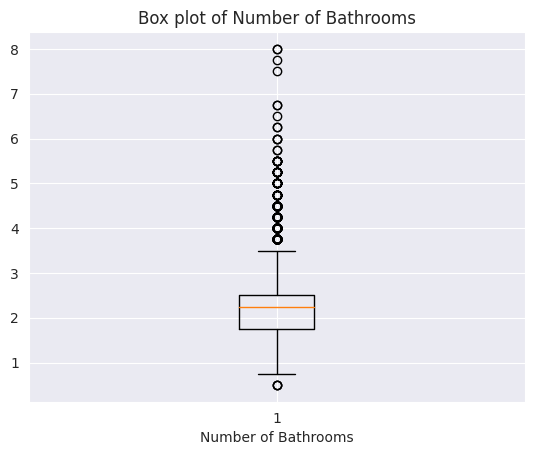

In [150]:
#Box plot for number of bathrooms

plt.boxplot(data['number of bathrooms'])
plt.xlabel("Number of Bathrooms")
plt.title("Box plot of Number of Bathrooms")
plt.show()

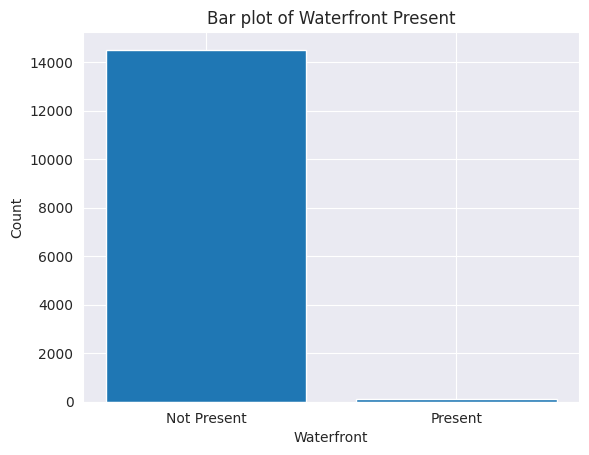

In [151]:
#Bar plot for waterfront present

waterfront_count = data['waterfront present'].value_counts()

plt.bar(waterfront_count.index, waterfront_count.values)
plt.xticks([0, 1], ['Not Present', 'Present'])
plt.xlabel("Waterfront")
plt.ylabel("Count")
plt.title("Bar plot of Waterfront Present")
plt.show()

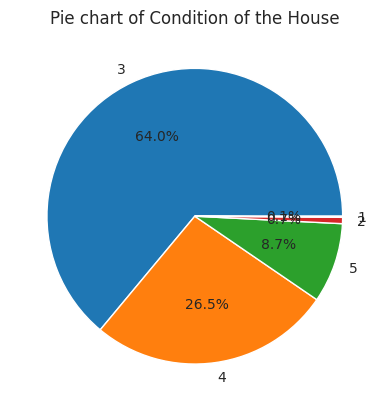

In [152]:
#Pie chart for condition of the house

condition_count = data['condition of the house'].value_counts()

plt.pie(condition_count.values, labels=condition_count.index, autopct='%1.1f%%')
plt.title("Pie chart of Condition of the House")
plt.show()

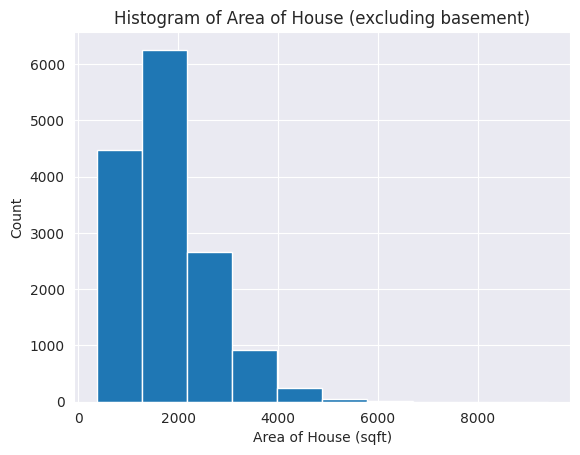

In [153]:
#Histogram for Area of the house(excluding basement)

plt.hist(data['Area of the house(excluding basement)'], bins=10)
plt.xlabel("Area of House (sqft)")
plt.ylabel("Count")
plt.title("Histogram of Area of House (excluding basement)")
plt.show()

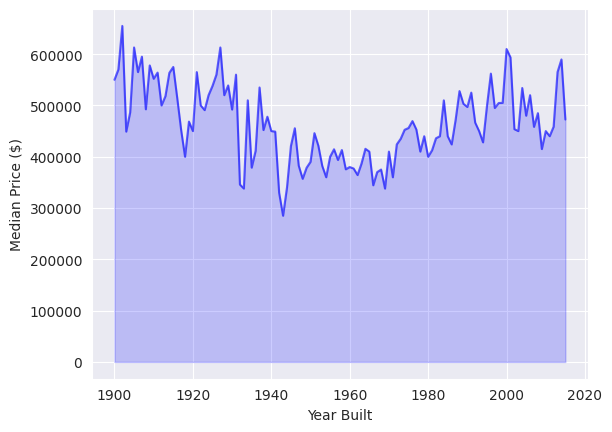

In [154]:
# Group the data by year and calculate the median price
median_price_by_year = df.groupby("Built Year")["Price"].median()

# Create an area chart
plt.fill_between(median_price_by_year.index, median_price_by_year.values, color="blue", alpha=0.2)
plt.plot(median_price_by_year.index, median_price_by_year.values, color="blue", alpha=0.6)

# Set the x-axis and y-axis labels
plt.xlabel("Year Built")
plt.ylabel("Median Price ($)")

# Show the chart
plt.show()

## **Bivariate analysis**

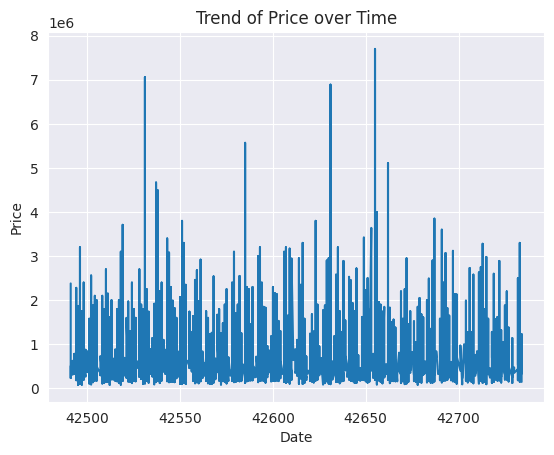

In [155]:
#Line plot for Price

df = data.sort_values('Date')

plt.plot(df['Date'], df['Price'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Trend of Price over Time")
plt.show()

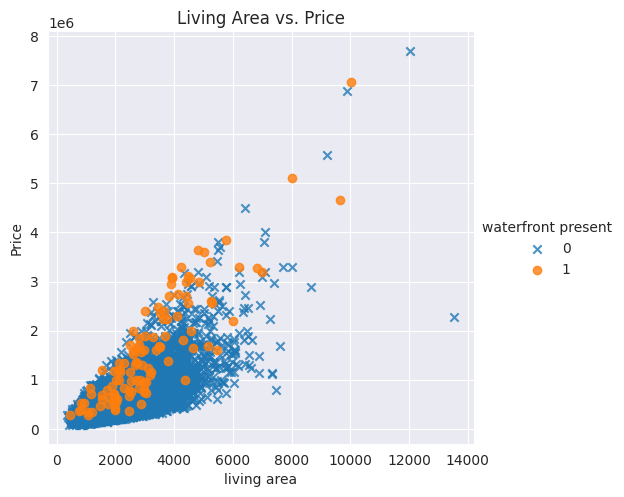

In [156]:
# Labeled plot of living area and price
sns.lmplot(x='living area', y='Price', data=df, hue='waterfront present', fit_reg=False, markers=['x', 'o'])
plt.title('Living Area vs. Price')
plt.show()

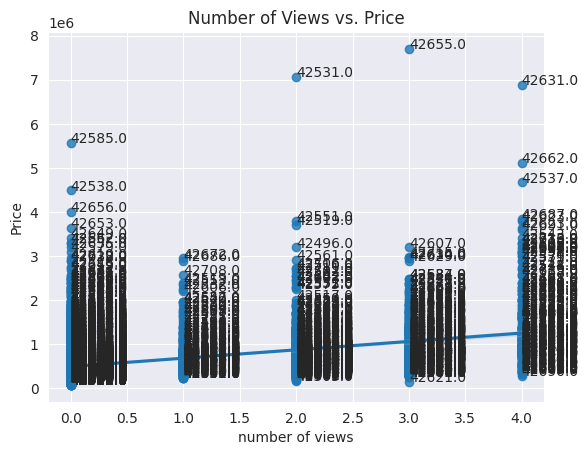

In [129]:
# Annotating plot of number of views and price
sns.regplot(x='number of views', y='Price', data=df)
plt.title('Number of Views vs. Price')
for i in range(len(df)):
    plt.annotate(df.iloc[i]['Date'], (df.iloc[i]['number of views'], df.iloc[i]['Price']))
plt.show()

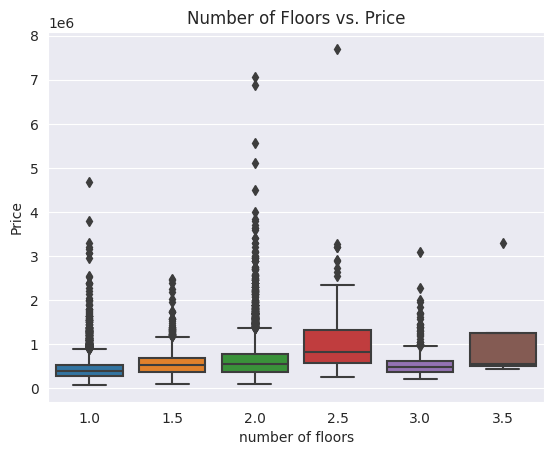

In [130]:
# Descriptive plot of number of floors and price
sns.boxplot(x='number of floors', y='Price', data=df)
plt.title('Number of Floors vs. Price')
plt.show()

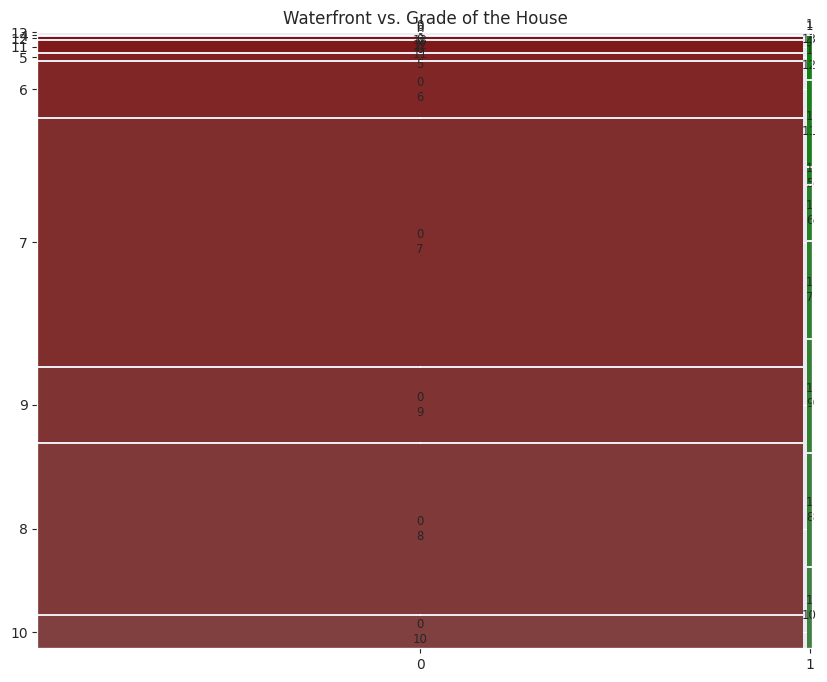

In [131]:
# Mosaic plot of waterfront present and grade of the house
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(df, ['waterfront present', 'grade of the house'], ax=ax)
plt.title('Waterfront vs. Grade of the House')
plt.show()


## **Multivariate analysis**

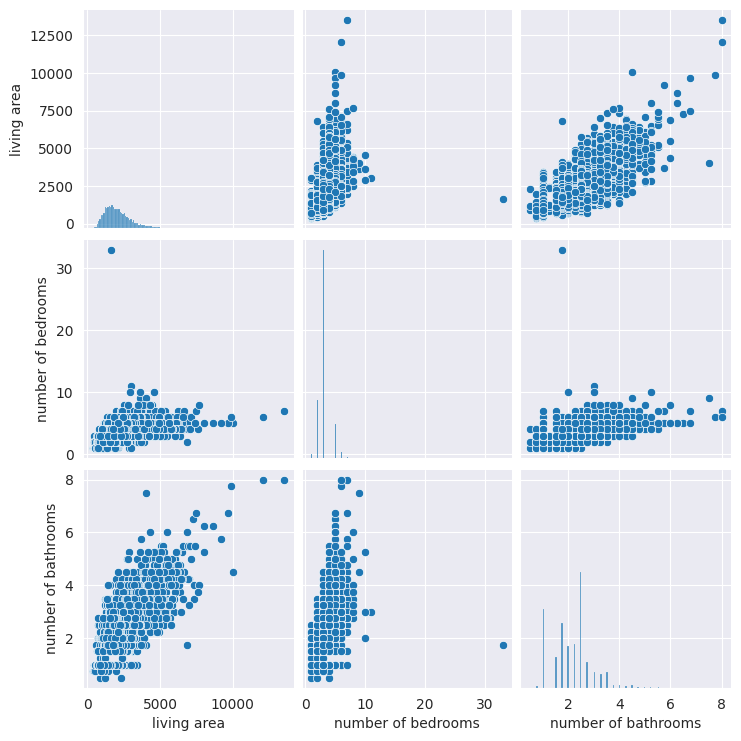

In [132]:
# Multipanel plot of living area, number of bedrooms, and number of bathrooms
sns.pairplot(df[['living area', 'number of bedrooms', 'number of bathrooms']])
plt.show()

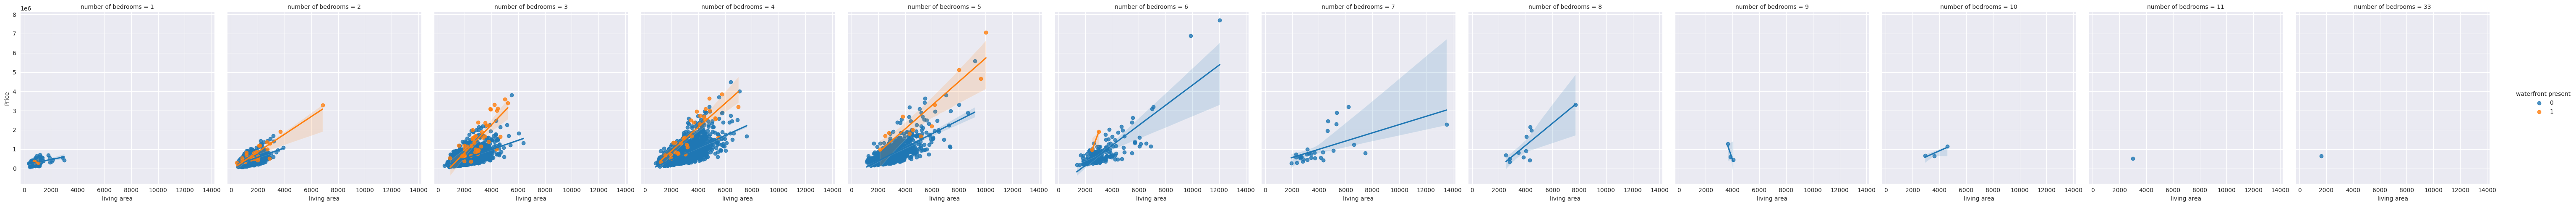

In [133]:
# Lattice-like plot of living area and price
sns.lmplot(x='living area', y='Price', data=df, hue='waterfront present', col='number of bedrooms')
plt.show()

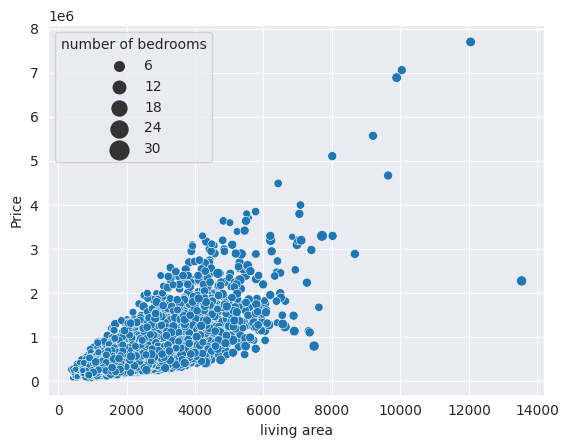

In [134]:
# Bubble plot of living area, number of bedrooms, and price
sns.scatterplot(x='living area', y='Price', size='number of bedrooms', sizes=(20,200), data=df)
plt.show()

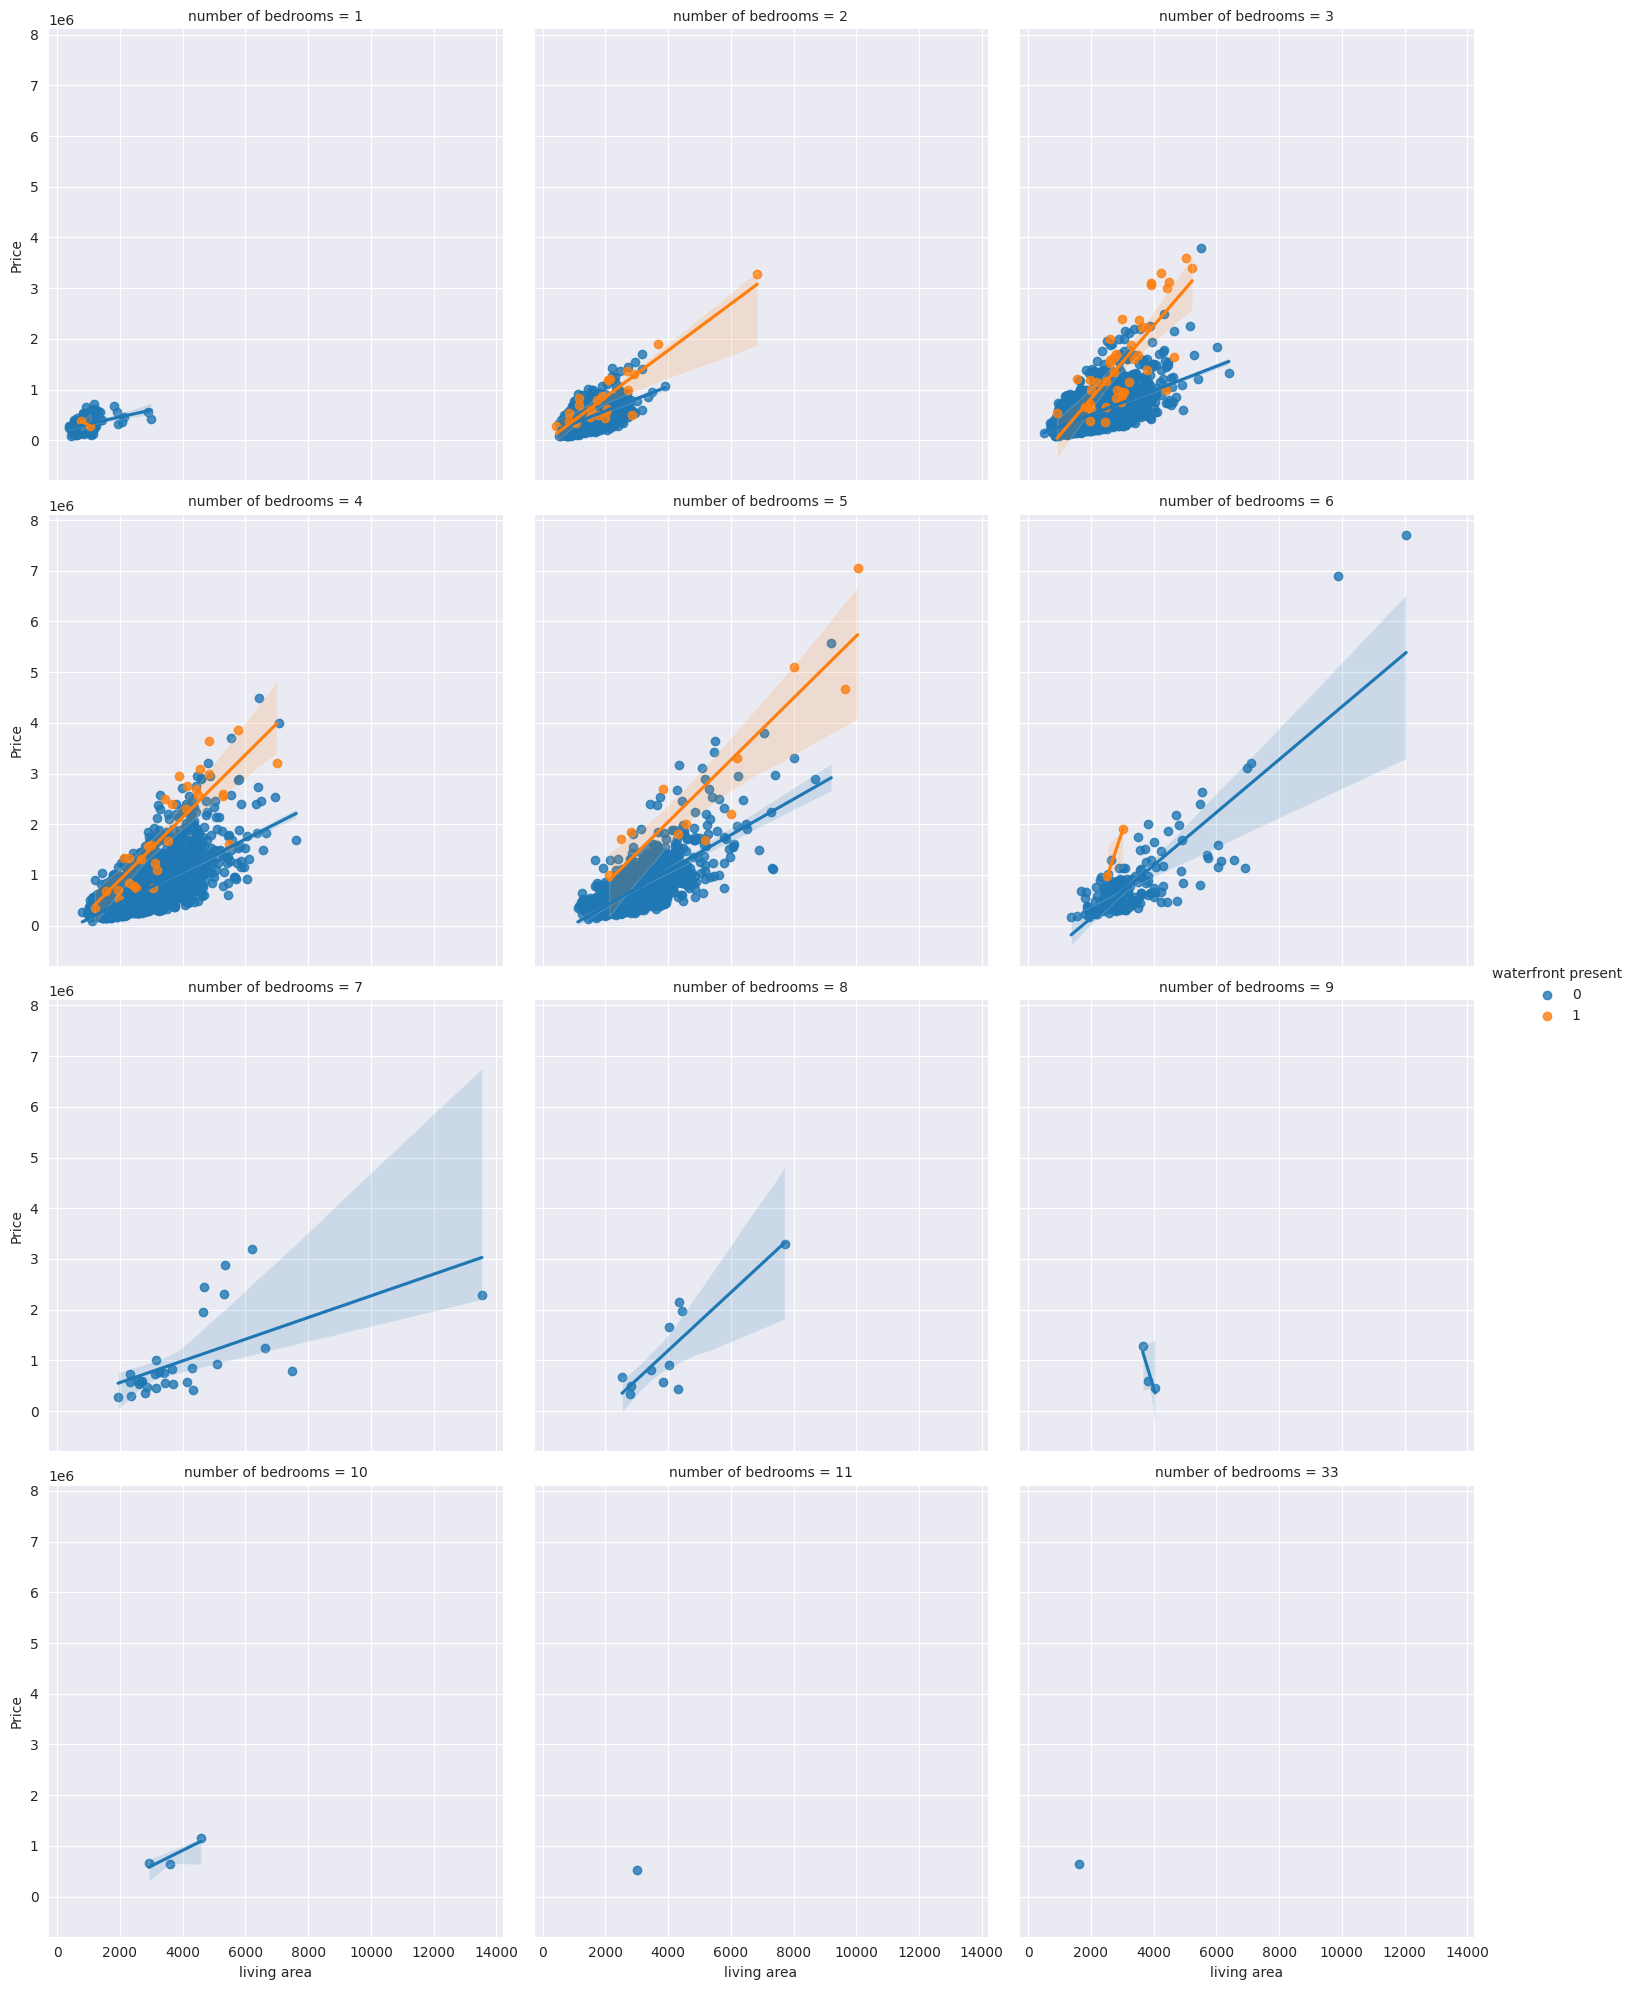

In [135]:
# Co-plot of living area and price, conditioned on the waterfront present
sns.lmplot(x='living area', y='Price', data=df, hue='waterfront present', col='number of bedrooms', col_wrap=3)
plt.show()

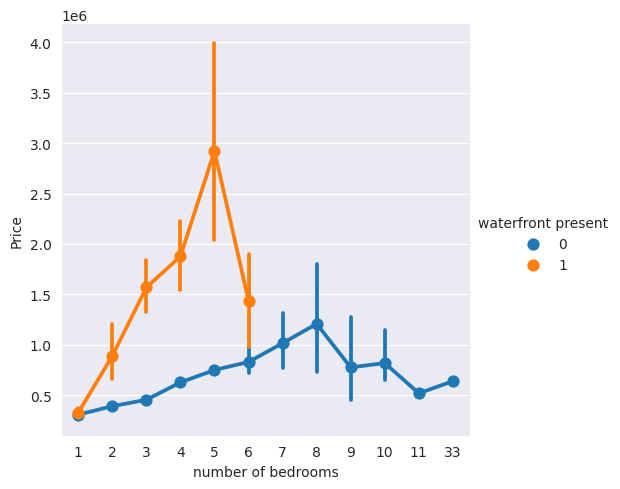

In [136]:
# Point plot of number of bedrooms and average price, conditioned on the waterfront present
sns.catplot(x='number of bedrooms', y='Price', data=df, hue='waterfront present', kind='point', estimator=np.mean)
plt.show()

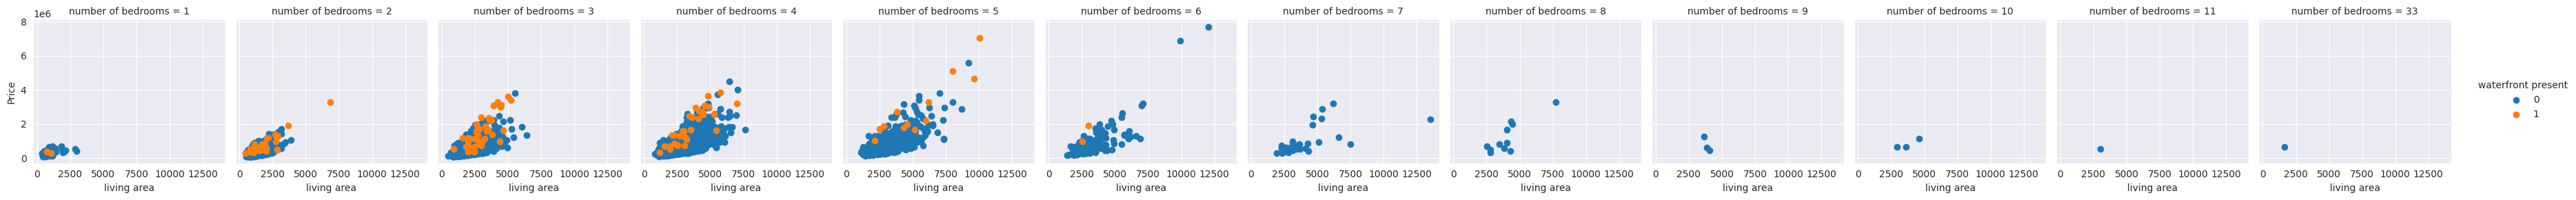

In [137]:
# ggplot-style plot of living area and price
sns.set_style('darkgrid')
g = sns.FacetGrid(df, col='number of bedrooms', hue='waterfront present')
g.map(plt.scatter, 'living area', 'Price')
g.add_legend()
plt.show()

## **Descriptive statistics**

In [138]:
# display basic statistics of numerical columns
print('Basic statistics of numerical columns:\n')
print(df.describe())

Basic statistics of numerical columns:

                 id          Date  number of bedrooms  number of bathrooms  \
count  1.462000e+04  14620.000000        14620.000000         14620.000000   
mean   6.762821e+09  42604.538646            3.379343             2.129583   
std    6.237575e+03     67.347991            0.938719             0.769934   
min    6.762810e+09  42491.000000            1.000000             0.500000   
25%    6.762815e+09  42546.000000            3.000000             1.750000   
50%    6.762821e+09  42600.000000            3.000000             2.250000   
75%    6.762826e+09  42662.000000            4.000000             2.500000   
max    6.762832e+09  42734.000000           33.000000             8.000000   

        living area      lot area  number of floors  waterfront present  \
count  14620.000000  1.462000e+04      14620.000000        14620.000000   
mean    2098.262996  1.509328e+04          1.502360            0.007661   
std      928.275721  3.791962e+0

In [139]:
# display information about missing values in columns
print('\nMissing value information:\n')
print(df.isnull().sum())


Missing value information:

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                    

In [140]:
# display correlation matrix among numerical columns
corr_matrix = df.corr()
print('\nCorrelation matrix:\n')
print(corr_matrix)


Correlation matrix:

                                             id      Date  number of bedrooms  \
id                                     1.000000  0.045966           -0.329034   
Date                                   0.045966  1.000000           -0.015663   
number of bedrooms                    -0.329034 -0.015663            1.000000   
number of bathrooms                   -0.516909 -0.026485            0.509784   
living area                           -0.648127 -0.021958            0.570526   
lot area                              -0.100269  0.004392            0.034416   
number of floors                      -0.312305 -0.010335            0.177294   
waterfront present                    -0.112937  0.012006           -0.006257   
number of views                       -0.293004 -0.004782            0.078665   
condition of the house                -0.045061 -0.027402            0.026597   
grade of the house                    -0.673448 -0.033097            0.352945   
Area o

In [141]:
# display skewness of numerical columns
print('\nSkewness of numerical columns:\n')
print(df.skew())


Skewness of numerical columns:

id                                       -0.000802
Date                                      0.143747
number of bedrooms                        2.663257
number of bathrooms                       0.556663
living area                               1.538337
lot area                                 10.155206
number of floors                          0.586158
waterfront present                       11.294672
number of views                           3.409219
condition of the house                    1.018018
grade of the house                        0.777584
Area of the house(excluding basement)     1.436446
Area of the basement                      1.609744
Built Year                               -0.472049
Renovation Year                           4.359764
Postal Code                               0.227735
Lattitude                                -0.523831
Longitude                                 0.873803
living_area_renov                         1.08195

In [142]:
# display kurtosis of numerical columns
print('\nKurtosis of numerical columns:\n')
print(df.kurtosis())


Kurtosis of numerical columns:

id                                        -1.201221
Date                                      -1.130823
number of bedrooms                        69.240310
number of bathrooms                        1.588195
living area                                6.073617
lot area                                 164.757273
number of floors                          -0.523576
waterfront present                       125.586791
number of views                           10.968839
condition of the house                     0.351359
grade of the house                         1.048022
Area of the house(excluding basement)      3.402258
Area of the basement                       3.139635
Built Year                                -0.673474
Renovation Year                           17.011306
Postal Code                               -1.058364
Lattitude                                 -0.619219
Longitude                                  0.950315
living_area_renov              

In [143]:
# display unique values and their counts for all categorical columns
print('\nUnique values and counts for categorical columns:\n')
for col in df.select_dtypes(include=['float', 'int']):
    print(f'{col}:')
    print(df[col].value_counts())
    print('\n')



Unique values and counts for categorical columns:

id:
6762810145    1
6762822659    1
6762822254    1
6762822002    1
6762821899    1
             ..
6762826866    1
6762825325    1
6762823084    1
6762823984    1
6762831463    1
Name: id, Length: 14620, dtype: int64


Date:
42543    142
42546    131
42545    131
42558    127
42559    121
        ... 
42675      1
42506      1
42584      1
42577      1
42611      1
Name: Date, Length: 241, dtype: int64


number of bedrooms:
3     6612
4     4724
2     1844
5     1079
6      176
1      136
7       30
8       11
9        3
10       3
33       1
11       1
Name: number of bedrooms, dtype: int64


number of bathrooms:
2.50    3678
1.00    2509
1.75    2062
2.25    1378
2.00    1323
1.50     968
2.75     831
3.00     510
3.50     504
3.25     424
3.75     101
4.00      81
4.50      72
4.25      56
0.75      47
4.75      17
5.00      15
5.25      12
5.50       8
1.25       7
6.00       3
0.50       3
6.75       2
8.00       2
6.25       2


## **Handling missing values**

In [144]:
# Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

# Replace missing values with the median
df = df.fillna(df.median())

# Check for missing values again
print("Number of missing values in each column after filling:")
print(df.isnull().sum())

# Save the data to a new CSV file
df.to_csv("house_prices_cleaned.csv", index=False)

Number of missing values in each column:
id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price        